In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import stats
from pprint import pprint
import json








## Population Analysis

In [2]:
# Read in data files for population data
total_pop = "Resources/population.csv"
west_pop = "Resources/westcoastpop.csv"
east_pop = "Resources/eastcoastpop.csv"

total_pop = pd.read_csv(total_pop) 
west_pop = pd.read_csv(west_pop)
east_pop = pd.read_csv(east_pop)

total_pop.index=['2014','2015','2016','2017','2018']
new_pop=total_pop.drop(['Unnamed: 0'],axis=1)

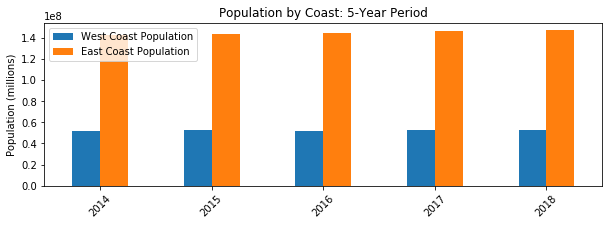

In [3]:
total_pop.drop(['Unnamed: 0'],axis=1).plot(kind="bar", figsize=(10,3), rot=45)
plt.title('Population by Coast: 5-Year Period')
plt.ylabel('Population (millions)')  
plt.savefig('TotP.png')
plt.show()

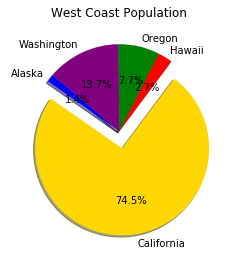

In [4]:
#Prepare pie chart for west coast population 
labels=['Alaska','California','Hawaii','Oregon','Washington']
sizes=[3689100,194733131,7108524,20088553,35769330]
colors=["blue","gold","red","green","purple"]

explode=(0,.2,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("West Coast Population")
plt.show()

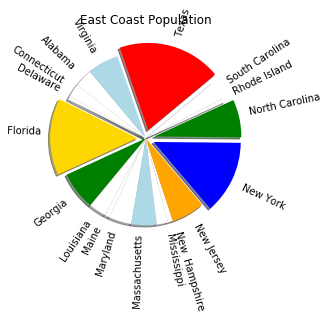

In [5]:
#Prepare pie chart for east coast population
labels=['Alabama','Connecticut','Delaware','Florida','Georgia','Louisiana','Maine','Maryland','Massachusetts','Mississippi','New  Hampshire','New Jersey','New York','North Carolina','Rhode Island','South Carolina','Texas','Virginia']
sizes=[24334274,17924864,4762723,103060733,51571428,23346377,6665207,30094150,34113577,14945768,6691469,44754821,98678915,50790593,5284851,24798243,139295109,42108795]       
explode=(0,0,0,.1,0,0,0,0,0,0,0,0,.1,.1,0,0,.1,0)
colors=("white","white","white","gold","green","white","white","white","lightblue","white","white","orange","blue","green","white","white","red","lightblue")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, rotatelabels=True,startangle=130)
plt.title("East Coast Population")
plt.show()

## GDP Analysis

In [6]:
# Read in the east coast GDP CSV
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/GDP_East.csv', thousands=',')
east_data = pd.DataFrame(csv_file)
east_data
east_data.columns = ['State', '2014', '2015', '2016', '2017', '2018']

# Sum total of east coast GDP per year
east_sum = east_data.sum()

# Read in the west coast GDP CSV
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/GDP_West.csv', thousands=',')
west_data = pd.DataFrame(csv_file)
west_data.columns = ['State', '2014', '2015', '2016', '2017', '2018']

# Sum total of west coast GDP per year
west_sum = west_data.sum()
west_df = pd.DataFrame(west_sum)

# Combine the two into a total GDP summary table
sum_df = pd.DataFrame(east_sum)
sum_df.columns = ['East Coast']
sums_df = sum_df.join(west_df)
sums_df.columns = ['East Coast', 'West Coast']
sums_df = sums_df.T
del sums_df['State']
sums_df

# Transform GDP Summary table for readability
sums_df = sums_df.T

HTTPError: HTTP Error 404: Not Found

In [ ]:
# Summary East v West coast bar plot

labels = ['2014', '2015', '2016', '2017', '2018']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sums_df['East Coast'], width, label='East Coast')
rects2 = ax.bar(x + width/2, sums_df['West Coast'], width, label='West Coast')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total GDP in Millions of USD')
ax.set_title('Summary of GDP on Each Coast by Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('summaryGDP.png')

In [ ]:
# Look at pollution data
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/Bicoastal_Litter.csv')
litter_df = pd.DataFrame(csv_file)
# Clean the dataframe
litter_df
del litter_df['Unnamed: 0']
east_lit = litter_df.loc[litter_df['level_0'] == 'East Coast']
west_lit = litter_df.loc[litter_df['level_0'] == 'West Coast']

# Rename columns to match GDP data and sort
east_data
east_lit['State'] = ['AL', 'CT', 'DE', 'FL', 'GA', 'LA', 'ME', 'MD', 'MA', 'MS', 'NH', 'NJ', 'NY', 'NC', 'RI', 'SC', 'TX', 'VA']
east_lit
east_df = east_data.sort_values('State').copy()
east_litt = east_lit.sort_values('State').copy()

# Rename columns to match GDP data and sort
west_data
west_lit['State'] = ['AK', 'CA', 'HI', 'OR', 'WA']
west_lit
west_df = west_data.sort_values('State').copy()
west_litt = west_lit.sort_values('State').copy()
# Total Pollution dataframes-- east
east_total_litter = pd.DataFrame(east_litt.sum(axis=1))
east_total_litter = east_total_litter.join(east_litt['State'])
east_total_litter.set_index(['State'])
east_total_litter.columns = ['Total Pollution', 'State']
# Total Pollution dataframes-- west
west_total_litter = pd.DataFrame(west_litt.sum(axis=1))
west_total_litter = west_total_litter.join(west_litt['State'])
west_total_litter.set_index(['State'])
west_total_litter.columns = ['Total Pollution', 'State']

In [ ]:
# Bar plots comparing pollutants and GDP visually
labels = east_df['State']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/4, east_df['2018'], width, label='GDP')
rects2 = ax.bar(x + width/4, east_litt['Plastic Waste'], width, label='Plastic Waste')
rects3 = ax.bar(x + 3*width/4, east_litt['Foam Waste'], width, label='Foam Waste')
rects3 = ax.bar(x + 6*width/4, east_litt["Smoking Waste Items"], width, label='Smoking Waste')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Waste in tons')
ax.set_xlabel('State')
ax.set_title('Top Wastes by State (East)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('3polsVsGDP_east.png')

labels = west_df['State']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/4, west_df['2018'], width, label='GDP')
rects2 = ax.bar(x + width/4, west_litt['Plastic Waste'], width, label='Plastic Waste')
rects3 = ax.bar(x + 3*width/4, west_litt['Foam Waste'], width, label='Foam Waste')
rects3 = ax.bar(x + 6*width/4, west_litt["Smoking Waste Items"], width, label='Smoking Waste')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Waste in tons or GDP in millions')
ax.set_xlabel('State')
ax.set_title('Top Wastes by State (West)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('3polsVsGDP_west.png')

## Coastline Analysis

In [ ]:
# Open coastline CSV
csv_file = pd.read_csv("https://media.githubusercontent.com/media/deirdrebclark/Project1/master/Resources/coastline.csv", thousands=",")
coast_df = pd.DataFrame(csv_file)

# Format the coastline Dataframe
coast_df.columns = ['State', 'Coastline']
coast_df['Coastline'] = coast_df['Coastline'].str.strip(' mi')
coast_df['Coastline'] = coast_df['Coastline'].str.replace(',' , '')
coast_df['Coastline'] = coast_df['Coastline'].astype(int)
coast_df

# Separate into E vs W coast
east_state = ['AL', 'CT','DE','FL','GA','LA','ME','MD','MA','MS','NH','NJ','NY','NC','RI','SC','TX', 'VA']
east_coast = coast_df[coast_df.State.isin(east_state)]

west_state =  ['AK', 'CA', 'HI', 'OR', 'WA']
west_coast = coast_df[coast_df.State.isin(west_state)]
west_coast

In [ ]:
# Barplot for coastline values
labels = east_coast['State']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, east_coast['Coastline']/100, width, label='Coastline')
rects2 = ax.bar(x + width/2, east_total_litter['Total Pollution']/100000, width, label='Total Pollution')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized units (per 100 mi or per 100k tons)')
ax.set_title('Total Pollution vs E. Coastline Amount')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('coastline_east.png')

# Barplot for coastline values
labels = west_coast['State']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, west_coast['Coastline']/100, width, label='Coastline')
rects2 = ax.bar(x + width/2, west_total_litter['Total Pollution']/100000, width, label='Total Pollution')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized units (per 100 mi or per 100k tons)')
ax.set_title('Total Pollution vs W. Coastline Amount')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('coastline_west.png')

## Statistics

In [ ]:
#Coastline v Total Non-point Pollution
stats.linregress(west_coast['Coastline'], west_total_litter['Total Pollution'])
# rvalue=-0.25912315944531666
stats.linregress(east_coast['Coastline'], east_total_litter['Total Pollution'])
# rvalue=0.5543644933615807

#GDP v Total Non-point Pollution
stats.linregress(west_df['2018'], west_total_litter['Total Pollution'])
# rvalue=0.987650265665757 very strong correlation
stats.linregress(east_df['2018'], east_total_litter['Total Pollution'])
# rvalue=0.44829529090626186

#East v West Coast Pollution, GDP
stats.ttest_ind(east_total_litter['Total Pollution'], west_total_litter['Total Pollution'])
# pvalue=0.8510624099227789 not different
stats.ttest_ind(east_df['2018'], west_df['2018'])
# pvalue=0.4485761095948283 not different

# Coastal ANOVAs
stats.f_oneway(east_df['2018'], east_coast['Coastline'], east_total_litter['Total Pollution'])
# pvalue=0.0010412292719855817
stats.ttest_ind(east_df['2018'], east_coast['Coastline'])
# pvalue=0.0001969110170277953 significantly different; have nothing to do with one another
stats.f_oneway(west_df['2018'], west_coast['Coastline'], west_total_litter['Total Pollution'])
# pvalue=0.42347054854659516 not significantly different